<a href="https://colab.research.google.com/github/dataemperor/Shrimple/blob/shaithra/Shrimple_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 2. Load the Dataset

In [2]:
import pandas as pd

# Define the file path
file_path = '/content/drive/My Drive/Shrimple Dataset/Dataset Shrimple.xlsx'

# Load the dataset
df = pd.read_excel(file_path)


# 3. Explore the Data

In [3]:
# Display the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())

# Summary statistics
print(df.describe())

# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check for missing values
print(f"\nMissing values in each column:\n{df.isnull().sum()}")

# Check the data types of each column
print(f"\nData types of each column:\n{df.dtypes}")

# Summary statistics for numerical columns
print(f"\nSummary statistics for numerical columns:\n{df.describe()}") #Computes summary statistics for all numerical columns in the dataset.
# Provides an overview of numerical data distribution and identifies anomalies (e.g., extreme outliers).

# Check the distribution of the target variable
print(f"\nDistribution of the target variable:\n{df['Status'].value_counts()}")




        Date PondID  DOC   ph  Salinity  Transparency Alkalinity     Status
0 2024-10-12    H01  NaN  8.4        10          50.0        102  Breedable
1 2024-10-12    A01  NaN  8.5        14          45.0         85  Breedable
2 2024-10-12    A02  NaN  8.5        10          45.0         68  Breedable
3 2024-10-13    H01  NaN  8.5         9          50.0        119  Breedable
4 2024-10-13    A01  NaN  8.6        14          50.0        102  Breedable
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          416 non-null    datetime64[ns]
 1   PondID        416 non-null    object        
 2   DOC           297 non-null    float64       
 3   ph            416 non-null    object        
 4   Salinity      416 non-null    int64         
 5   Transparency  409 non-null    float64       
 6   Alkalinity    280 non-null    objec

### Observations
1. **Data Summary:**
   - **DOC, Transparency, Alkalinity:** Have missing values (DOC: 119 missing, Transparency: 7 missing, Alkalinity: 136 missing). These need to be handled.
   - **`ph` and `Alkalinity`:** Are stored as `object` but should likely be numerical.
   - **Target Variable `Status`:** The dataset is imbalanced (346 "Breedable" vs. 70 "Unbreedable"). Imbalanced classes may affect model training and evaluation.

2. **Numerical Data Distribution:**
   - **DOC:** Mean is 30.93, with a wide range (2 to 66). Missing values need to be addressed carefully.
   - **Salinity:** Mean is 25.99, but outliers are evident (max is 120). These need further investigation.
   - **Transparency:** Relatively consistent, but outliers exist (minimum is 0.1).
   - **Date:** The data spans from October 2024 to February 2025, which seems fine.

3. **Potential Data Issues:**
   - Missing data in key columns (e.g., `DOC`, `Transparency`, `Alkalinity`).
   - Outliers in numerical columns like `Salinity` and `Transparency`.
   - Data type mismatches (`ph` and `Alkalinity` as objects).
   - Imbalanced target variable `Status`.


Visualizations to Include in EDA

1.Distribution of Numerical Features

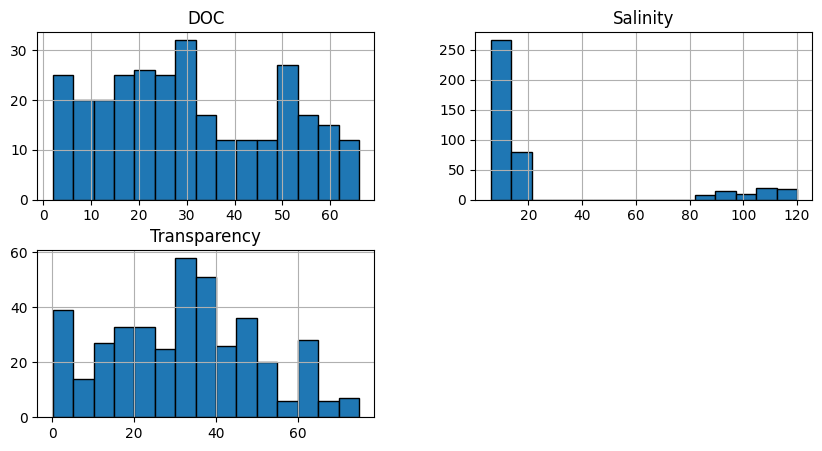

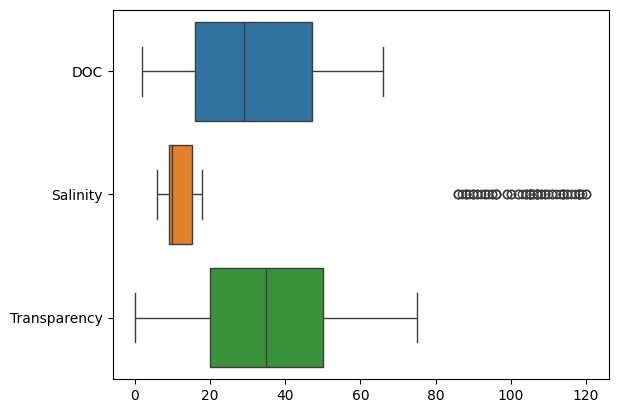

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#Use histograms or boxplots to understand the distributions of features like DOC, Salinity, and Transparency

# Histogram
df[['DOC', 'Salinity', 'Transparency']].hist(bins=15, figsize=(10, 5), edgecolor='black')
plt.show()

# Boxplot for outliers
sns.boxplot(data=df[['DOC', 'Salinity', 'Transparency']], orient='h')
plt.show()


2. Correlation Heatmap

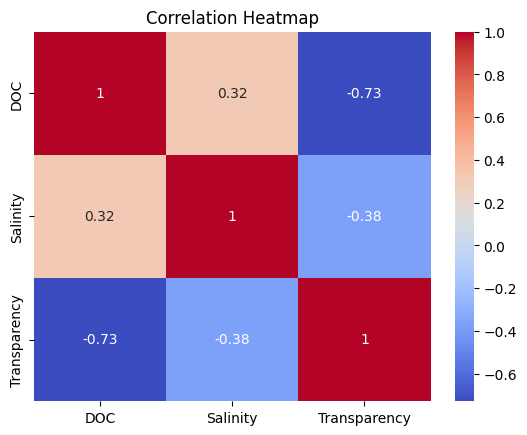

In [10]:
#Check correlations between numerical features to identify relationships.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation and plot heatmap
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




3. Target Variable Distribution

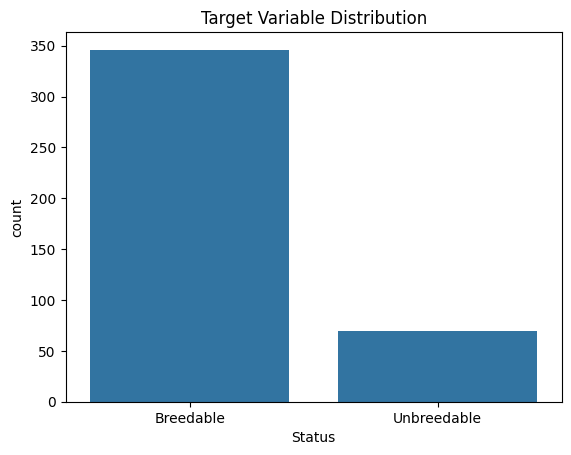

In [6]:
sns.countplot(x='Status', data=df)
plt.title("Target Variable Distribution")
plt.show()


4. Trend Analysis (Date Feature)

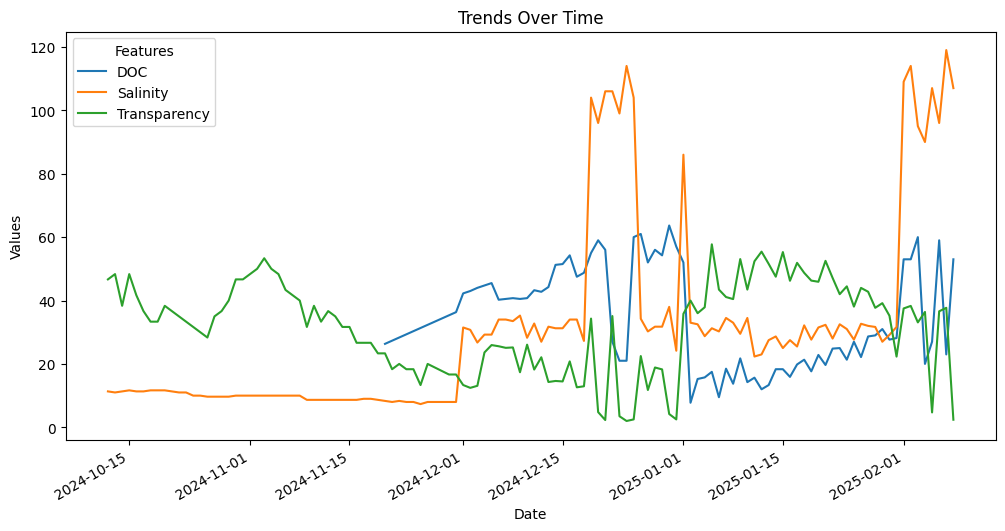

In [11]:
#Plot trends over time for features like DOC, Salinity, or Transparency

# Group by date and calculate the mean for numerical columns
df_grouped = df.groupby('Date').mean(numeric_only=True)

# Plot trends for selected features
df_grouped[['DOC', 'Salinity', 'Transparency']].plot(figsize=(12, 6))
plt.title("Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(title="Features")
plt.show()



5. Relationship Between Variables

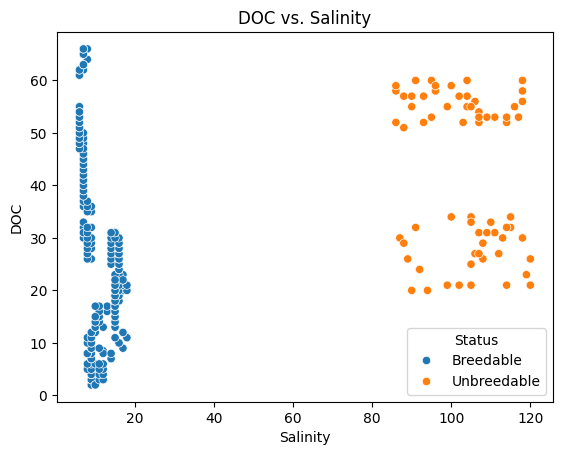

In [8]:
#Use scatter plots to understand relationships between features (e.g., DOC vs. Transparency or Salinity vs. ph)

sns.scatterplot(x='Salinity', y='DOC', hue='Status', data=df)
plt.title("DOC vs. Salinity")
plt.show()


6. Outlier Visualization

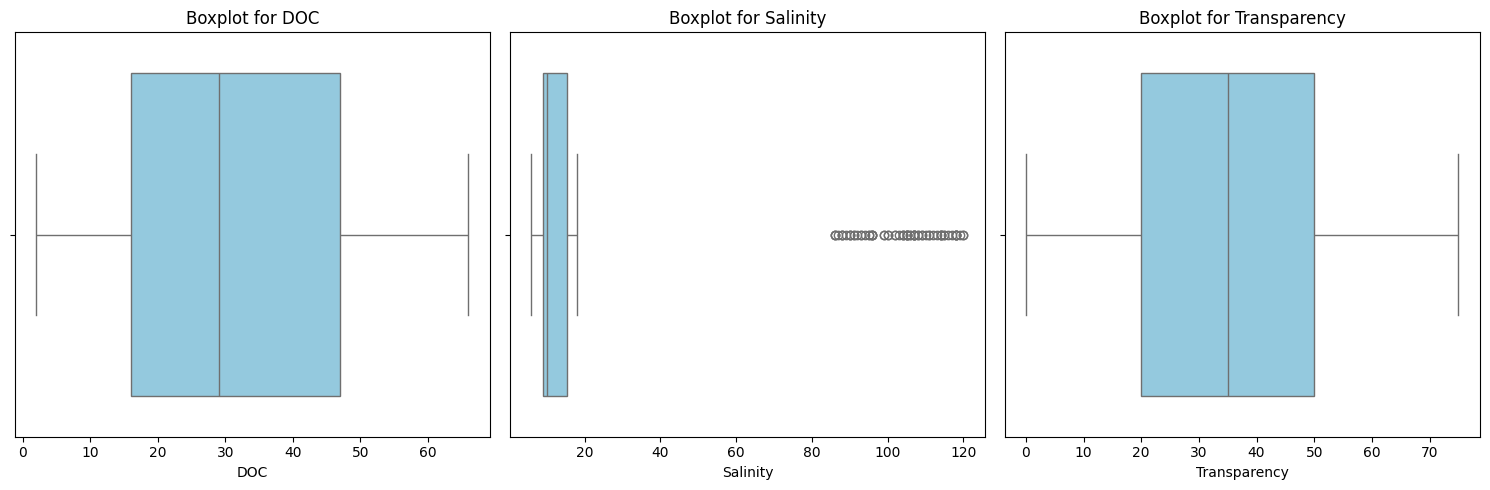

In [12]:
#Boxplots are great for spotting outliers in numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for numerical features
plt.figure(figsize=(15, 5))  # Set the figure size for better visualization
for i, col in enumerate(['DOC', 'Salinity', 'Transparency'], 1):  # Fix enumerate usage
    plt.subplot(1, 3, i)  # Create subplots in a single row
    sns.boxplot(x=df[col], color='skyblue')  # Boxplot for each column
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)  # Add x-axis label

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



1. **Boxplots**  
   - This is a boxplot visualization comparing the distributions of the three variables.
   - **DOC** and **Transparency** have relatively wide interquartile ranges (IQR), meaning their values are spread out.
   - **Salinity** has a narrow IQR but has significant **outliers** on the higher end (values beyond 80).
   - The presence of outliers in Salinity suggests a **skewed distribution**.

2. **Histograms**  
   - This set of histograms provides more detail on the frequency distributions of the variables.
   - **DOC** has a roughly uniform distribution with no significant skew.
   - **Salinity** is highly skewed, with most values concentrated around a low range (~10-20) but some extreme outliers at **higher values (~80-120)**.
   - **Transparency** shows a multimodal distribution, meaning it has multiple peaks.

### Insights:
- The combination of the **boxplot and histograms** shows that **Salinity has extreme outliers**, while **DOC and Transparency are more evenly spread**.
- Transparency might represent different environmental conditions due to its **multiple peaks**.
- Salinity's skewness and outliers indicate **potential anomalies or significant variations in water conditions**.